In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 

def eGreedy(k, rounds, epsilon, rewards, initialQ, alpha):  
    # Reward estimates for each bandit/website
    Q = np.zeros(k)
    # Reward at specific trial 'n' for each bandit
    R = np.zeros(k)
    # Cumulative reward for each bandit/website
    TR = np.zeros(k)
    # Counts for each bandit/website being chosen
    n = np.zeros(k)
    # Reward probability for each bandit (Real values unknown to the learner)
    rewardProb = rewards
    # Percentages of choice of optimal action after each round
    optimalActionRatio = np.zeros(rounds)
    # Random assignment of reward probabilities for each bandit/website and settting of R_n values to -1 for initiation
    for i in range(0, k):
        R[i] = -1
        Q[i] = initialQ
    for i in range(0, rounds):
        # Random number to decide between exploration and exploitation (choice = 1 (exploit), choice = 0 (explore))
        choice = np.random.binomial(1, p = (1 - epsilon))
        # Index is used for choosing a specific bandit/website out of the available options
        index = 0
        if(choice == 1):            
            # Exploit the best option
            index = np.argmax(Q)
        else:
            # Explore all bandits/websites
            index = random.randrange(k)
        Q_n = Q[index]
        R_n = R[index]
        # Reward = 1 if random number > bandit reward probability else 0
        reward = np.random.binomial(1, p = rewardProb[index])    
        # Calculate new estimate and cumulative reward for the bandit
        if n[index] == 0: # Special check for first trial/round
            Q_new = initialQ
        else:
            # Formula: Q_n+1 = Q_n + [R_n - Q_n] * alpha (alpha = stepsize)
            Q_new = Q_n + (R_n - Q_n) * alpha   
        R_new = reward
        # Update values for the bandit/website
        Q[index] = Q_new
        R[index] = R_new
        n[index] += 1
        TR[index] += reward
        # Save ratio of optimal action being selected at each round to the total rounds that have taken place
        optimalActionRatio[i] = (n[np.argmax(rewardProb)] / (i + 1))
    return Q, n, TR, optimalActionRatio


def UCB(k, rounds, c, rewards, initialQ, alpha):    
    # Reward estimates for each bandit/website
    Q = np.zeros(k)
    # Reward at specific trial 'n' for each bandit
    R = np.zeros(k)
    # Cumulative reward for each bandit/website
    TR = np.zeros(k)
    # Counts for each bandit/website being chosen
    n = np.zeros(k)
    # Reward probability for each bandit (Real values unknown to the learner)
    rewardProb = rewards
    # Percentages of choice of optimal action after each round
    optimalActionRatio = np.zeros(rounds)
    # Random assignment of reward probabilities for each bandit/website and settting of R_n values to -1 for initiation
    for i in range(0, k):
        R[i] = -1
        Q[i] = initialQ
    for i in range(0, rounds):
        # Check for maximisizing bandits/websites
        maxIndex = np.where(n == 0)[0]
        # Check if a bandit/website hasn't been chosen even once and select it
        if len(maxIndex) >= 1:
            # Index is used for choosing a specific bandit/website out of the available options
            index = maxIndex[0]
        else:
            # Storage of UCB values for selecting best arm
            A = np.zeros(k)
            for x in range(k):
                A[x] = Q[x] + c * math.sqrt(math.log(i + 1) / n[x])
            index = np.argmax(A)
        Q_n = Q[index]
        R_n = R[index]
        # Reward = 1 if random number > bandit reward probability else 0
        reward = np.random.binomial(1, p = rewardProb[index])    
        if n[index] == 0: # Special check for first trial/round
            Q_new = initialQ
            A_new = 0
        else:
            # Formula: Q_n+1 = Q_n + [R_n - Q_n] * alpha (alpha = stepsize)
            Q_new = Q_n + (R_n - Q_n) * alpha
        R_new = reward
        # Update values for the bandit/website
        Q[index] = Q_new
        R[index] = R_new
        n[index] += 1
        TR[index] += reward
        # Save ratio of optimal action being selected at each round to the total rounds that have taken place
        optimalActionRatio[i] = (n[np.argmax(rewardProb)] / (i + 1))
    return Q, n, TR, optimalActionRatio


def gradientAscent(k, rounds, rewards, initialH, alpha):    
    # Learning preference for each bandit/website
    H = np.zeros(k)
    # Initial probability of action being chosen
    iniProb = math.exp(0) / (k * math.exp(0))
    # Probabaility of choosing bandit/website at specific time 
    pieProb = np.zeros(k)
    # Reward at specific trial 'n' for each bandit
    R = np.zeros(k)
    # Cumulative reward for each bandit/website
    TR = np.zeros(k)
    # Counts for each bandit/website being chosen
    n = np.zeros(k)
    # Reward probability for each bandit (Real values unknown to the learner)
    rewardProb = rewards
    # Percentages of choice of optimal action after each round
    optimalActionRatio = np.zeros(rounds)
    # Random assignment of reward probabilities for each bandit/website and settting of R_n values to -1 for initiation
    for i in range(0, k):
        R[i] = -1
        H[i] = initialH
        pieProb[i] = iniProb
    for i in range(0, rounds):
        # Choose bandit with the best preference
        index = np.argmax(H)
        # Update preference of chosen bandit/website and the rest of them
        for j in range(0, k):
            # Fetch values from previous step
            H_t = H[j]
            R_t = R[j]
            prob_t = pieProb[j]
            meanR_t = TR[j] / (i+1)
            # Reward = 1 if random number > bandit reward probability else 0
            reward = np.random.binomial(1, p = rewardProb[index])   
            if j == index:
                # Formula for chosen bandit: H_t+1 = H_t + (R_t - mean(R_t) * (1 - pieProb) * alpha (alpha = stepsize)
                H_new = H_t + (R_t - meanR_t) * (1 - prob_t) * alpha
                # Update count of chosen bandit/website
                n[j] += 1
            else:
                # Formula for rest of the bandits: H_t+1 = H_t - (R_t - mean(R_t) * pieProb * alpha
                H_new = H_t - (R_t - meanR_t) * (prob_t) * alpha
            # Update values for the bandit/website
            R_new = reward
            H[j] = H_new
            R[j] = R_new
            TR[j] += reward
        # Save ratio of optimal action being selected at each round to the total rounds that have taken place
        optimalActionRatio[i] = (n[np.argmax(rewardProb)] / (i + 1))
    return H, n, TR, optimalActionRatio


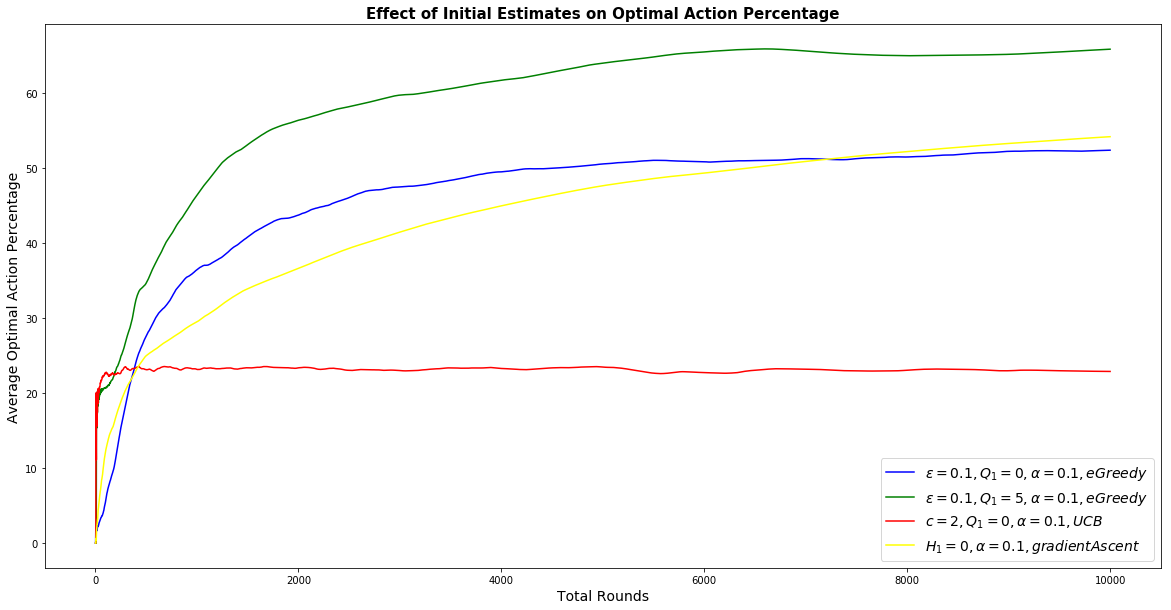

In [13]:
# Experiments
experiments = 100

# Variables for experiment 1 setting (eGreedy)
rewards = [0.045, 0.12, 0.077, 0.012, 0.15]
epsilon = 0.1
initialQ = 0
rounds = 10000
k = 5
alpha = 0.1

cumulativeRatios1 = np.zeros(rounds)

for i in range (experiments):
    Q1, n1, TR1, Ratio1 = eGreedy(k, rounds, epsilon, rewards, initialQ, alpha)
    cumulativeRatios1 = np.add(cumulativeRatios1, Ratio1)

avgPercentage1 = (cumulativeRatios1 / experiments) * 100

# Variables for experiment setting 2 (eGreedy)
epsilon = 0
initialQ = 5

cumulativeRatios2 = np.zeros(rounds)

for i in range (experiments):
    Q2, n2, TR2, Ratio2 = eGreedy(k, rounds, epsilon, rewards, initialQ, alpha)
    cumulativeRatios2 = np.add(cumulativeRatios2, Ratio2)
    
avgPercentage2 = (cumulativeRatios2 / experiments) * 100

# Variables for experiment setting 3 (UCB)
c = 2
initialQ = 0

cumulativeRatios3 = np.zeros(rounds)

for i in range (experiments):
    Q3, n3, TR3, Ratio3 = UCB(k, rounds, c, rewards, initialQ, alpha)
    cumulativeRatios3 = np.add(cumulativeRatios3, Ratio3)

avgPercentage3 = (cumulativeRatios3 / experiments) * 100

# Variables for experiment setting 4 (gradientAscent)
initialH = 0

cumulativeRatios4 = np.zeros(rounds)

for i in range (experiments):
    H4, n4, TR4, Ratio4 = gradientAscent(k, rounds, rewards, initialH, alpha)
    cumulativeRatios4 = np.add(cumulativeRatios4, Ratio4)

avgPercentage4 = (cumulativeRatios4 / experiments) * 100

# Comparison of Optimal Action percentage for the three 
steps = np.arange(1, rounds + 1, 1)
plt.figure(figsize = (20, 10))
plt.plot(steps, avgPercentage1, color = "blue", label = r'$\varepsilon = 0.1, Q_1 = 0, \alpha = 0.1, eGreedy$')
plt.plot(steps, avgPercentage2, color = "green", label = r'$\varepsilon = 0.1, Q_1 = 5, \alpha = 0.1, eGreedy$')
plt.plot(steps, avgPercentage3, color = "red", label = r'$c = 2, Q_1 = 0, \alpha = 0.1, UCB$')
plt.plot(steps, avgPercentage4, color = "yellow", label = r'$H_1 = 0, \alpha = 0.1, gradientAscent$')
plt.xlabel("Total Rounds", fontsize = 14)
plt.ylabel("Average Optimal Action Percentage", fontsize = 14)
plt.title(f"Effect of Initial Estimates on Optimal Action Percentage", fontsize = 15, fontweight = "bold")
plt.legend(fontsize = 14)
plt.savefig("OptActionPercentage.png")